<center><u><H1>Random Forest</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
iris = load_iris()

## Preprocessing:

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Creating a model

In [6]:
rf = RandomForestClassifier(n_estimators=100)

In [7]:
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Making Predictions:

In [8]:
rf.predict(X_test_std[0, :].reshape(1, -1))

array([0])

In [9]:
rf.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[1., 0., 0.]])

## Metrics:

In [10]:
rf_pred = rf.predict(X_test_std)

In [11]:
print(accuracy_score(y_test,rf_pred))

0.9777777777777777


In [12]:
print(confusion_matrix(y_test,rf_pred))

[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [13]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Cross Validation:

In [14]:
cross_val_score(rf, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

## Feature Importance:

In [15]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [16]:
list(zip(features, rf.feature_importances_))

[('sepal length (cm)', 0.08501811134955178),
 ('sepal width (cm)', 0.054443470759392334),
 ('petal length (cm)', 0.4192646105436593),
 ('petal width (cm)', 0.4412738073473966)]

## Plotting Decision Boundaries:

In [17]:
def plot_regions(X, y, classifier):
    n_classes = len(np.unique(y))
    plot_colors = ["blue","red","black"]
    res = 0.02

    for i, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        
        X = iris.data[:, pair]

        clf = classifier.fit(X, y)

        fig = plt.figure(1,figsize=(14, 10))
        plt.subplot(2, 3, i + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, res), np.arange(y_min, y_max, res))
        
        output = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
        output = output.reshape(xx.shape)
        plt.pcolormesh(xx,yy, output, cmap=plt.cm.Accent)
        
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        
        for cl, color in zip(range(n_classes), plot_colors):
            plt.scatter(X[y==cl, 0], X[y==cl, 1], c=color, label=iris.target_names[cl])
            plt.legend(loc='best', fancybox=True)
          
    plt.suptitle("Random Forest Classifier")

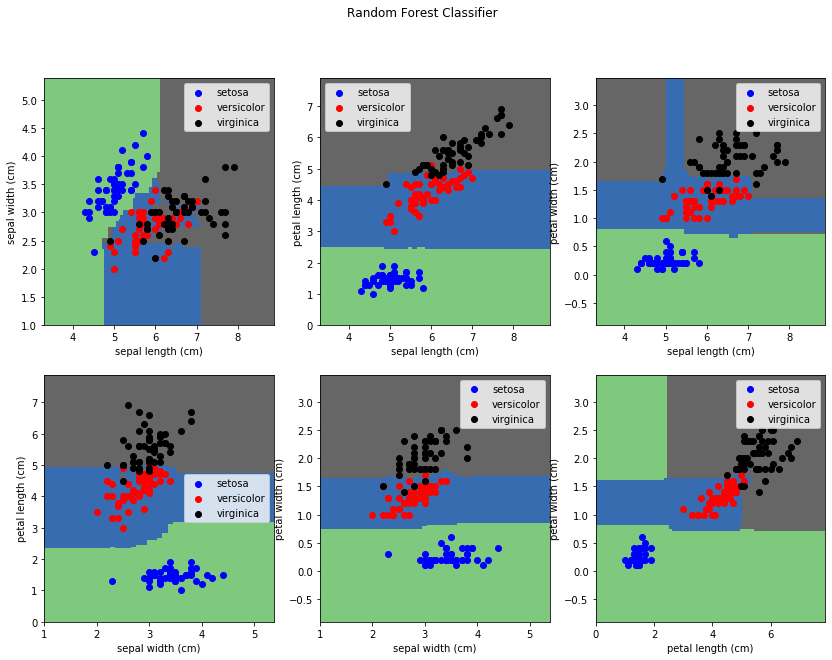

In [18]:
rf_ = RandomForestClassifier(n_estimators=1000)
plot_regions(X=iris.data,y=iris.target,classifier=rf_)

## Reference: 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html